In [273]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y,X_test,y_test = mnist["data"][:60000], mnist["target"][:60000],mnist["data"][60000:], mnist["target"][60000:]

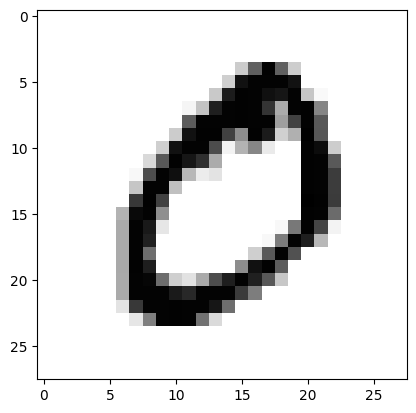

In [274]:
import matplotlib.pyplot as plt
plt.imshow(255-X[1].reshape(28,28), cmap="gray")
plt.show()

In [275]:
y_ohe = np.zeros((X.shape[0], 10))
y_ohe.shape

(60000, 10)

In [276]:
y_ohe[np.arange(len(y_ohe)),y.astype(int) ] = 1

In [277]:
w = np.random.randn(784,10)*0.001
b = np.zeros((1,10))
X = X.astype(float)/255.0
X_test = X_test.astype(float)/255.0

In [278]:
def loss_gradient(w,X , b, y_ohe):
    o_mat = np.matmul(X,w) + b
    o_mat = np.exp(o_mat - np.max(o_mat, axis=1, keepdims=True))
    o_mat /= o_mat.sum(axis=1, keepdims=True)
    return o_mat-y_ohe


In [286]:
def train_iter(X,y_ohe,batch_size = 5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    for i in range(0,X.shape[0],batch_size):
        yield X[indices[i: min(i+batch_size, X.shape[0])]],y_ohe[indices[i: min(i+batch_size, X.shape[0])]]

In [287]:
epochs = 3
learning_rate = 0.03
batch_size = 5

In [288]:
for epoch in range(epochs):
    for X_batch , y_batch in train_iter(X,y_ohe,batch_size = 5):
        w -= (learning_rate/batch_size) * np.matmul(np.transpose(X_batch),loss_gradient(w,X_batch,b,y_batch))
        b -= (learning_rate/batch_size) * np.sum(loss_gradient(w,X_batch,b,y_batch), axis=0)


In [306]:
pred = (np.matmul(X_test,w) + b).argmax(axis=1)

In [307]:
accuracy_bools = (pred == y_test.astype(pred.dtype))

In [310]:
print(f'Accuracy : {sum(accuracy_bools)/len(accuracy_bools) * 100:.2f}%')

Accuracy : 92.35%
